# K-Nearest Neighbor
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Nearest Neighbor** algorithm
- play with the hyperparameter K 
- try KNN on **real-world data**, i.e. the CAPTCHA of a website in ZJU

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook

%load_ext autoreload
%autoreload 2

### KNN experiment with hyperparameter K

(400,)


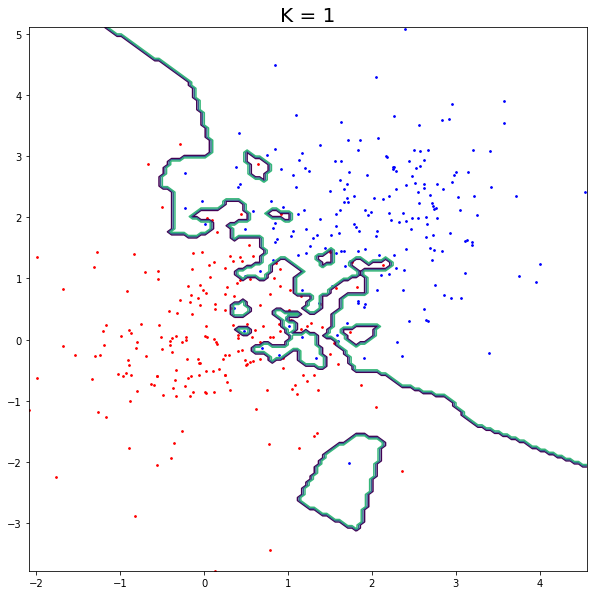

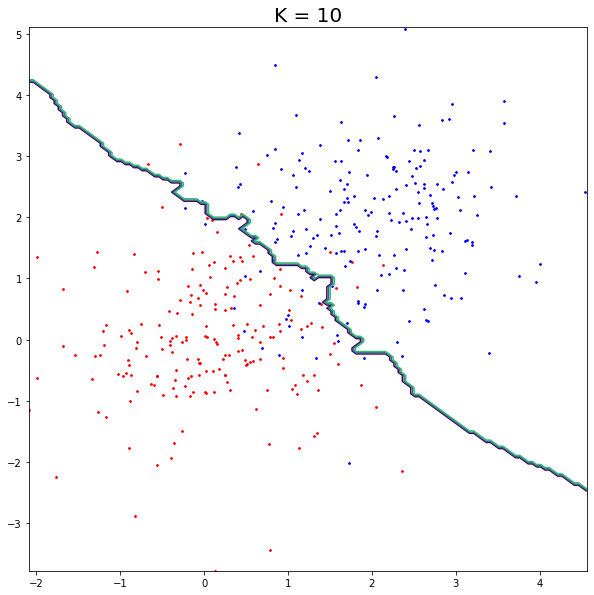

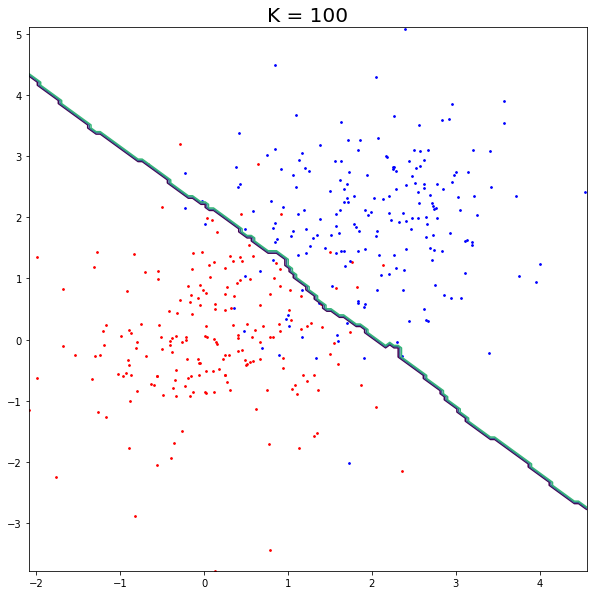

In [3]:
from mkdata import mkdata
from knn_plot import knn_plot

[X, y] = mkdata()
print(y.shape)
K = [1, 10, 100]
for k in K:
    knn_plot(X, y, k)

### Now Let's hack the website http://cwcx.zju.edu.cn/WFManager/login.jsp

In [3]:
from hack import hack
from extract_image import extract_image
from show_image import show_image

## make train data

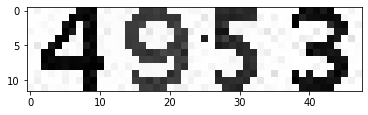

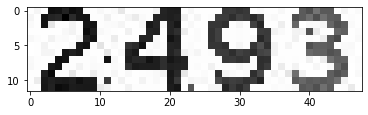

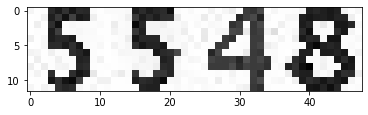

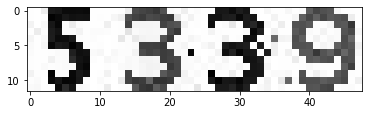

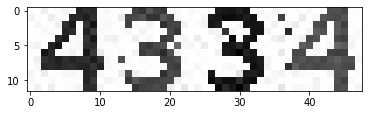

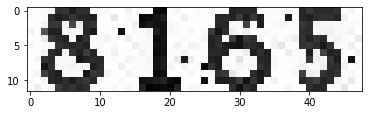

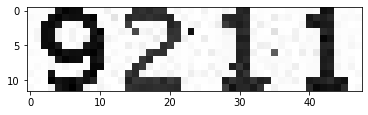

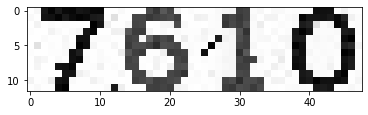

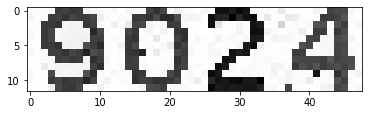

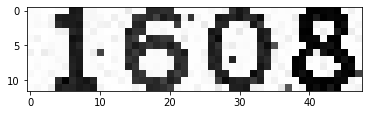

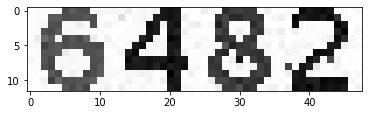

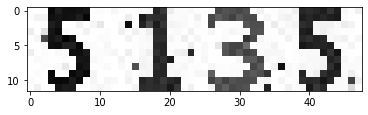

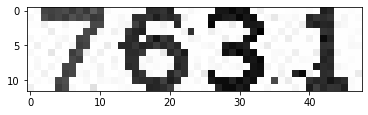

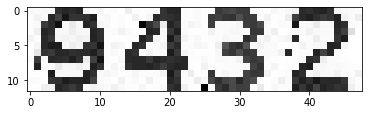

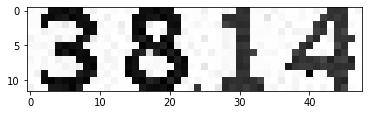

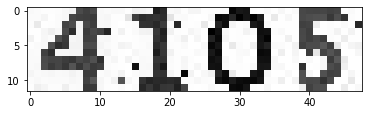

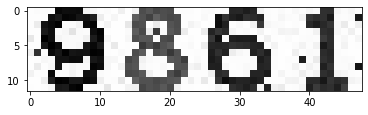

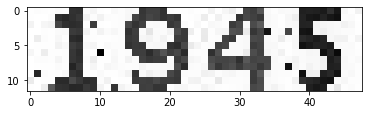

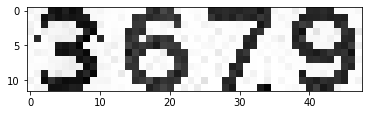

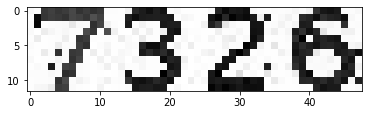

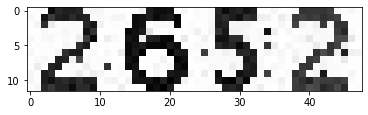

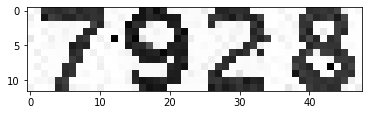

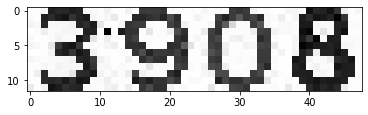

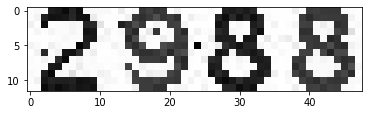

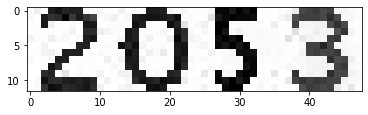

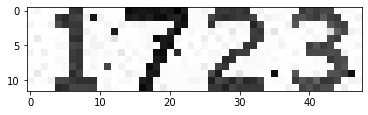

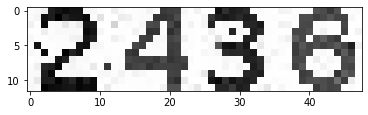

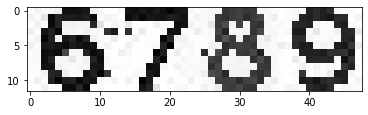

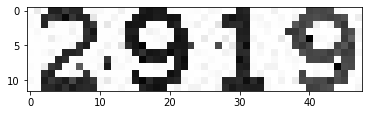

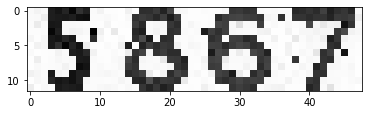

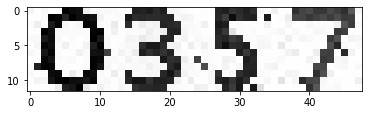

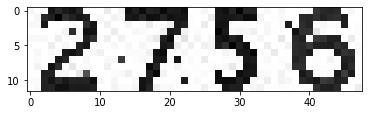

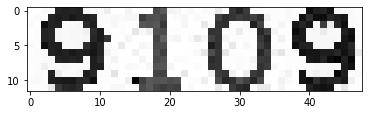

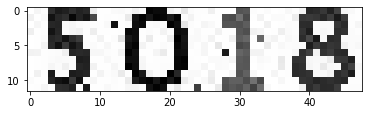

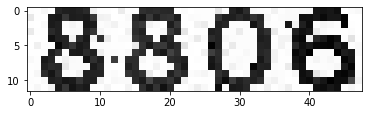

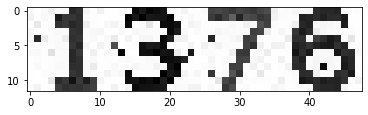

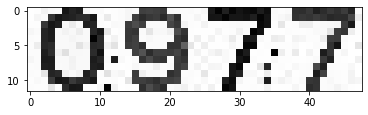

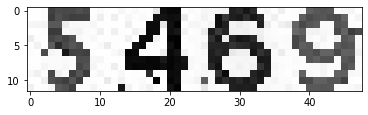

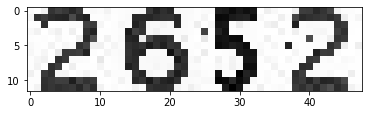

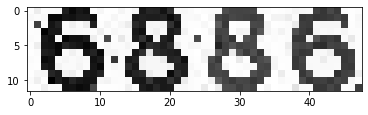

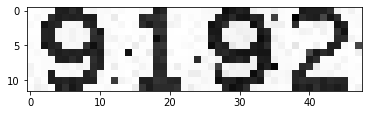

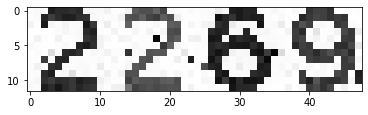

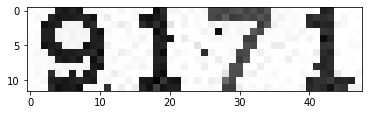

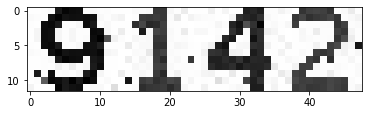

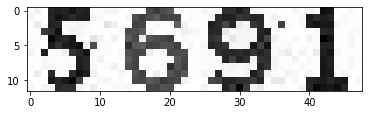

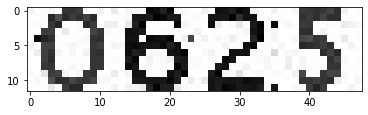

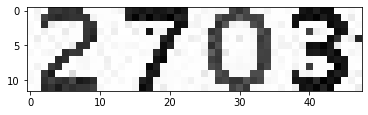

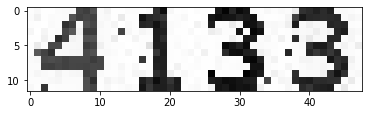

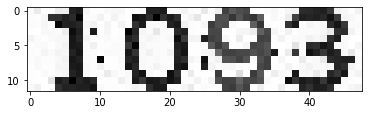

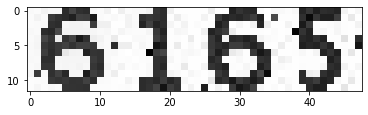

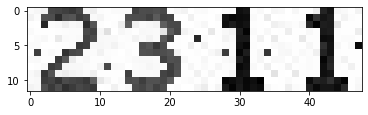

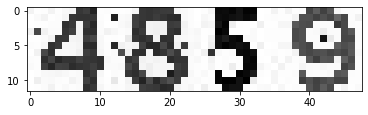

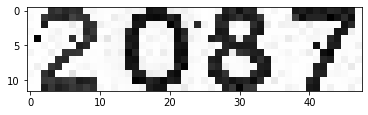

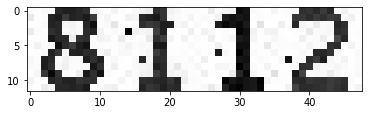

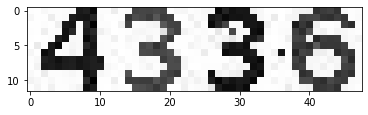

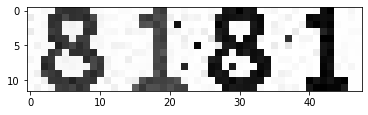

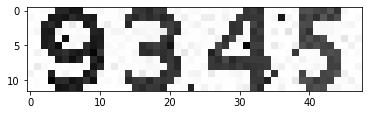

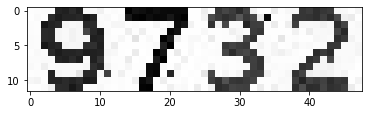

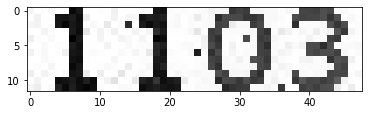

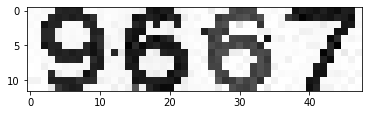

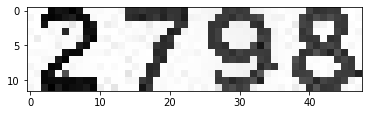

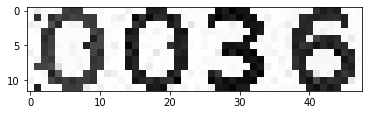

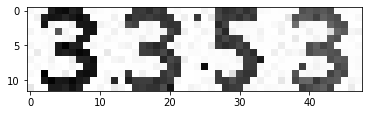

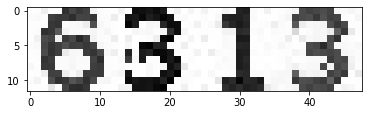

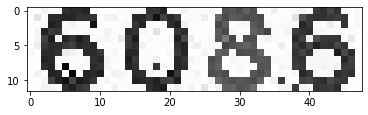

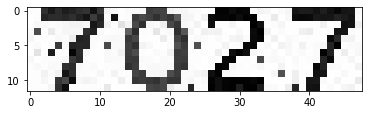

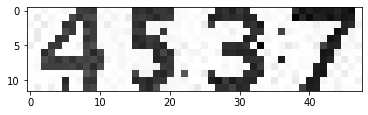

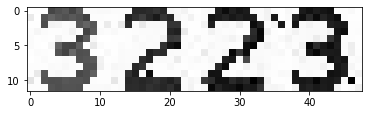

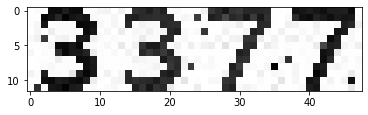

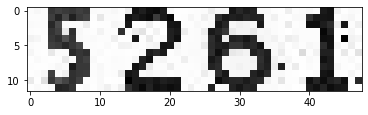

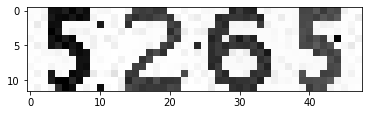

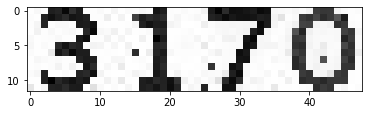

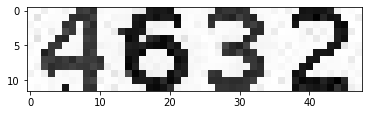

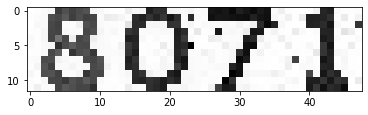

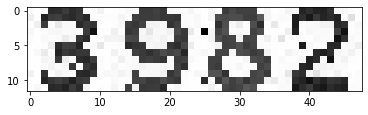

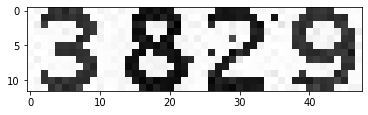

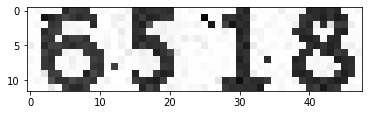

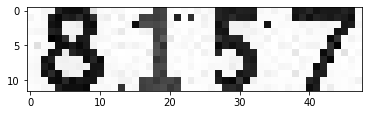

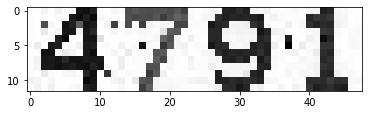

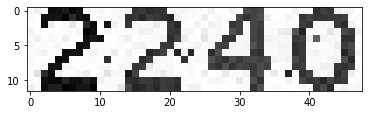

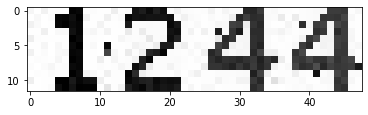

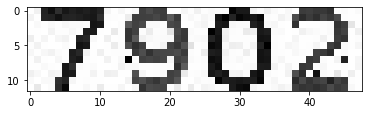

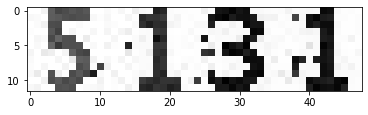

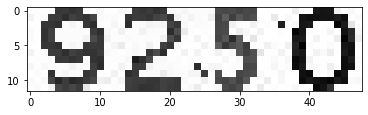

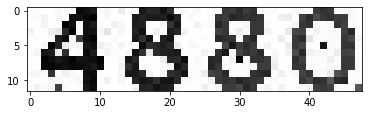

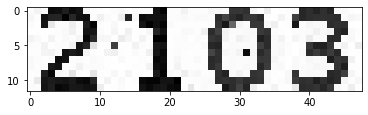

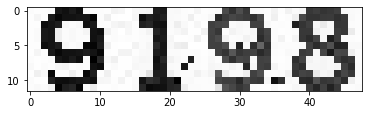

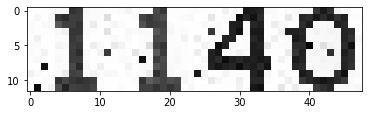

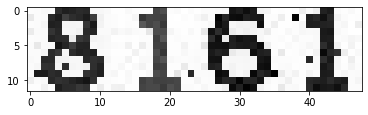

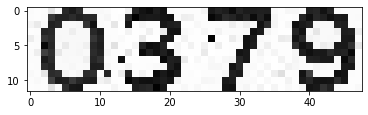

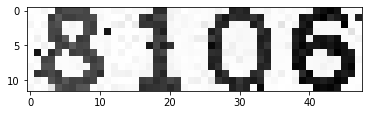

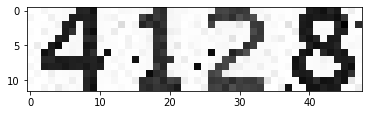

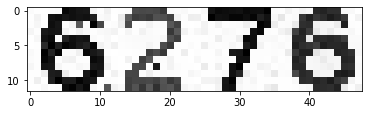

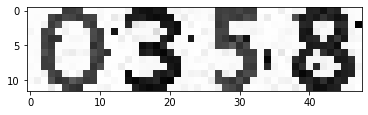

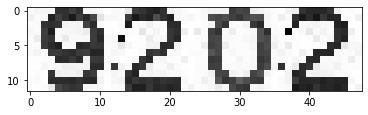

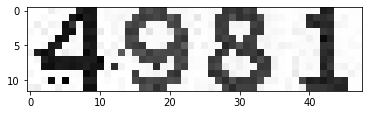

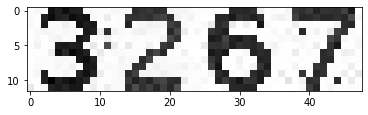

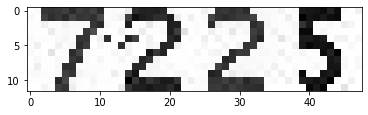

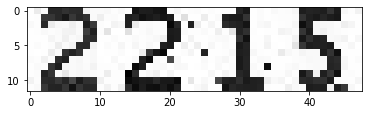

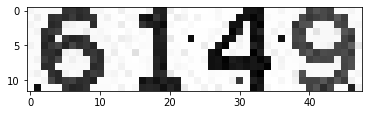

(400, 144)


In [4]:
train_img = './train_data/0.jpg' 
x_train = extract_image(train_img)
show_image(x_train)
INDEX=list(range(1,100))
for i in INDEX:
    train_img = './train_data/'+str(i)+'.jpg' 
    x = extract_image(train_img)
    show_image(x)
    x_train=np.vstack((x_train,x))
print(x_train.shape)

## make test data

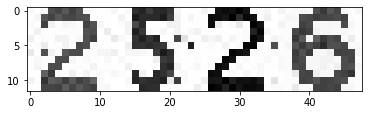

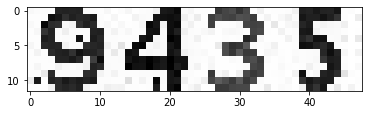

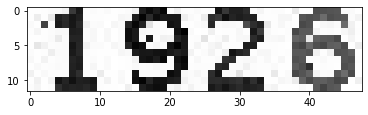

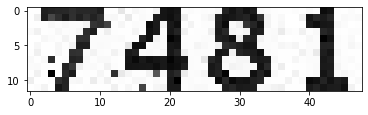

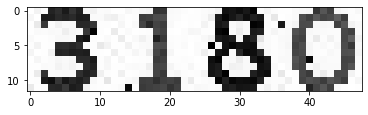

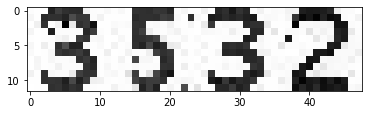

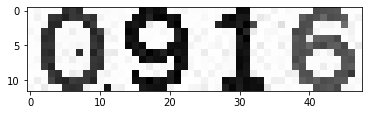

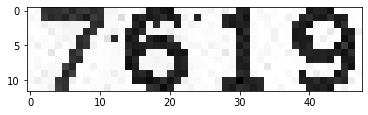

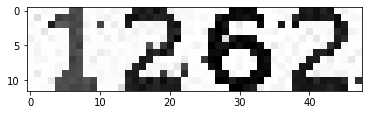

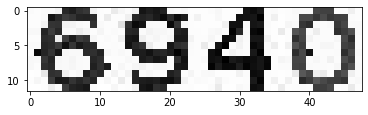

(40, 144)


In [5]:
test_img = './test_data/0.jpg' 
x_test = extract_image(test_img)
show_image(x_test)
INDEX=list(range(1,10))
for i in INDEX:
    test_img = './test_data/'+str(i)+'.jpg' 
    x = extract_image(test_img)
    show_image(x)
    x_test=np.vstack((x_test,x))
print(x_test.shape)

## Load all the data

In [29]:
import pandas as pd
df_train = pd.read_excel('y_train.xls',header=0,index_col=0)
df_test  = pd.read_excel('y_test.xls' ,header=0,index_col=0)
y_train=np.array(df_train[['label1','label2','label3','label4']]).reshape(400,1).squeeze()
y_test=np.array(df_test[['label1','label2','label3','label4']]).reshape(40,1).squeeze()

### save model

In [16]:
# label your training data and store x_train and y_train 
np.savez("hack_data.npz",x_train=x_train,y_train=y_train)

## test the model

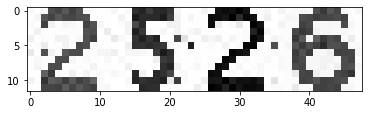

pred =  [2. 5. 2. 6.]


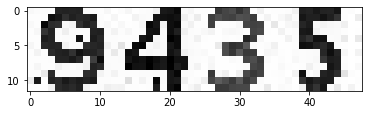

pred =  [9. 4. 3. 5.]


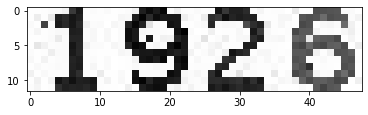

pred =  [1. 9. 2. 6.]


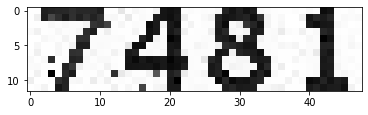

pred =  [7. 4. 8. 1.]


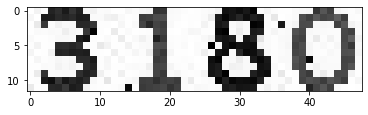

pred =  [3. 1. 8. 0.]


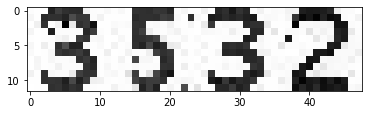

pred =  [3. 5. 3. 2.]


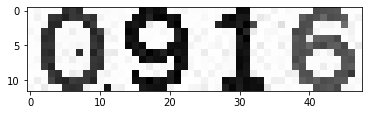

pred =  [0. 9. 1. 6.]


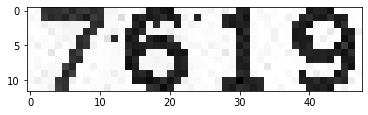

pred =  [7. 6. 1. 9.]


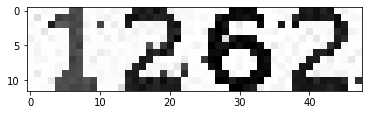

pred =  [1. 2. 6. 2.]


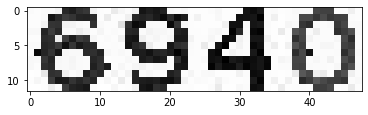

pred =  [6. 9. 4. 0.]


In [30]:
test_img = []
res=pd.DataFrame(columns=df_test.columns)
for i in range(0,10):
    test_img = './test_data/'+str(i)+'.jpg' 
    digit=hack(test_img)[np.newaxis,:]
    _res=pd.DataFrame(digit,columns=df_test.columns)
    res=res.append(_res)
    print("pred = ",digit.squeeze())

In [46]:
y_pred=res.values.squeeze()
y_true=df_test.values.squeeze()
accu=np.sum(y_pred==y_true)/(y_pred.shape[0]*y_pred.shape[1])
print(f"the accuracy = {accu*100}%")

the accuracy = 100.0%
